## Introduction ## 

I was tasked to create a model that will be able to predict the selling price of a car based on certain parameters,such as kms driven ,model of the car e.t.c



## Quality

- names are pretty inconsistent
- names have company names attached to it
- some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
- company: many of the names are not of any company like 'Used', 'URJENT', and so on.
- year has many non-year values
- year is in object. Change to integer
- Price has Ask for Price
- Price has commas in its prices and is in object
- kms_driven has object values with kms at last.
- It has nan values and two rows have 'Petrol' in them
- fuel_type has nan values

## Importing Dependices ##

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

## Importing Data ##

In [73]:
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
#df=pd.read_csv('quikr_car.csv')

In [74]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


This here is just a preview of the data that we just imported , we want to see how it looks before going into the preprocessing phase.

## Preprocessing Data ##

In [75]:
df.shape

(4340, 8)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


Within our data we have 8 columns with 4340 entries in total . We have 5 columns that catrgorical which means we will ahve to convert them into numerical in the future when we have to train our model.


In [77]:
## Creating a backup variable of the dataframe
backup = df.copy()

In [78]:
## Checking for missing or null values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

As we see we have no null or missing values from our dataset we is good .

In [79]:
# df['b']=df['name'].str.split(" ")
# u = range(0,len(df))
# o = []
# for i in u:
#     y = df['b'][i][0]
#     o.append(y)
# df['company'] = o
# df.drop("b",axis=1,inplace = True)

In [80]:
df['current_year'] = 2022
df['Car_year'] = df['current_year'] - df['year']

In [81]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,Car_year
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,2022,15
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,2022,15
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,2022,10
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,2022,5
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2022,8


## Data Analysis ##

In [82]:
import seaborn as sns

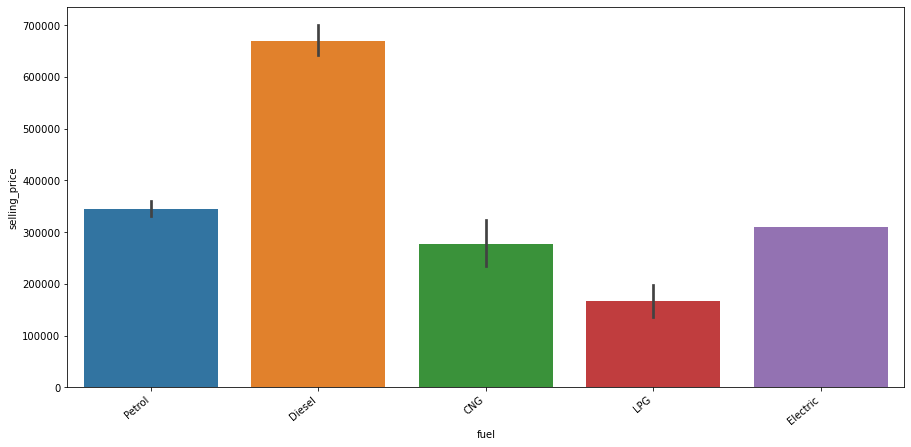

In [83]:
plt.subplots(figsize=(15,7))
ax=sns.barplot(x='fuel',y='selling_price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

In [84]:
## Grouping the data frames according to certain column .Then storing them in certain variable.
LPG = df[(df['fuel'] == "LPG")]
Petrol = df[(df['fuel'] == "Petrol")]
Electric = df[(df['fuel'] == "Electric")]
Diesel = df[(df['fuel'] == "Diesel")]
CNG = df[(df['fuel'] == "CNG")]
Manual = df[(df['transmission'] == "Manual")]
Auto = df[(df['transmission'] == "Automatic")]

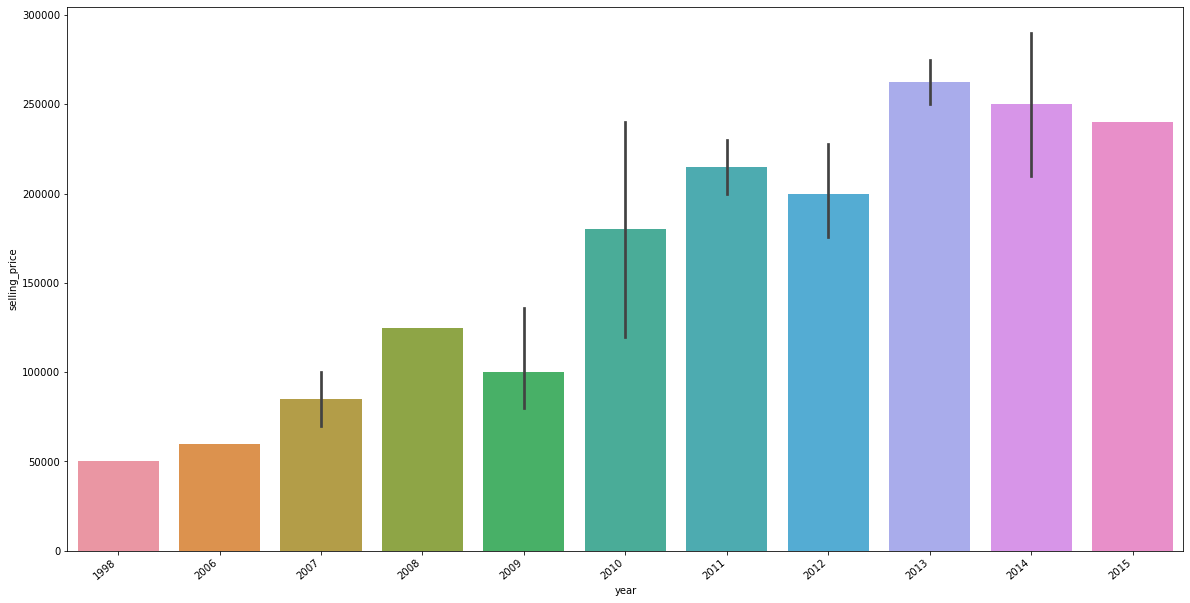

In [85]:
plt.subplots(figsize=(20,10))
ax=sns.barplot(x='year',y='selling_price',data=LPG)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

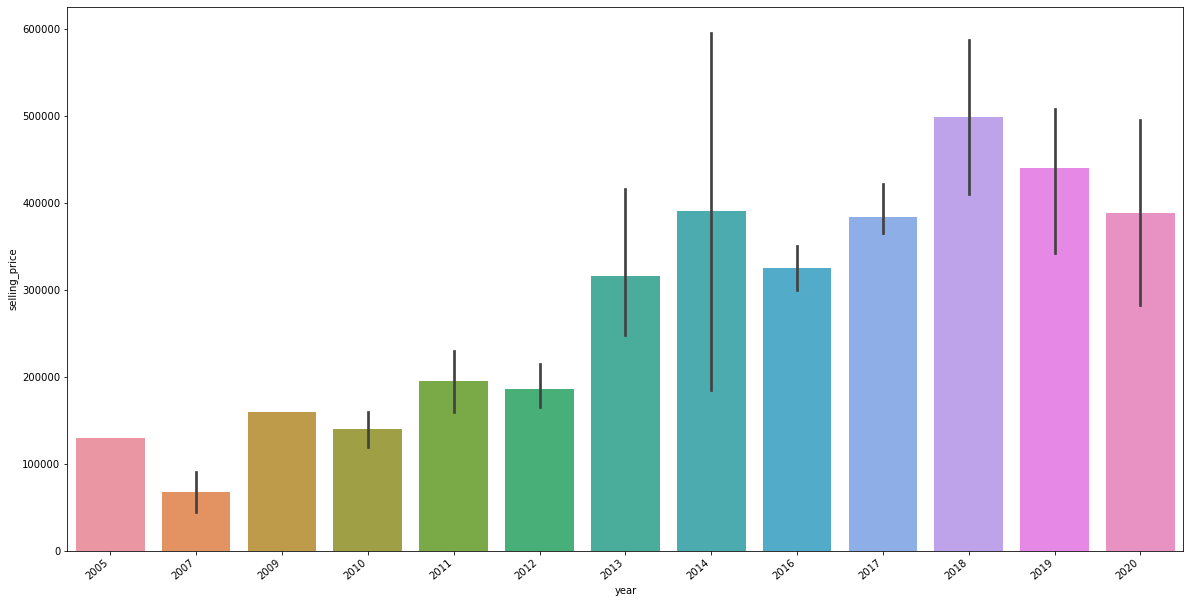

In [86]:
plt.subplots(figsize=(20,10))
ax=sns.barplot(x='year',y='selling_price',data=CNG)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

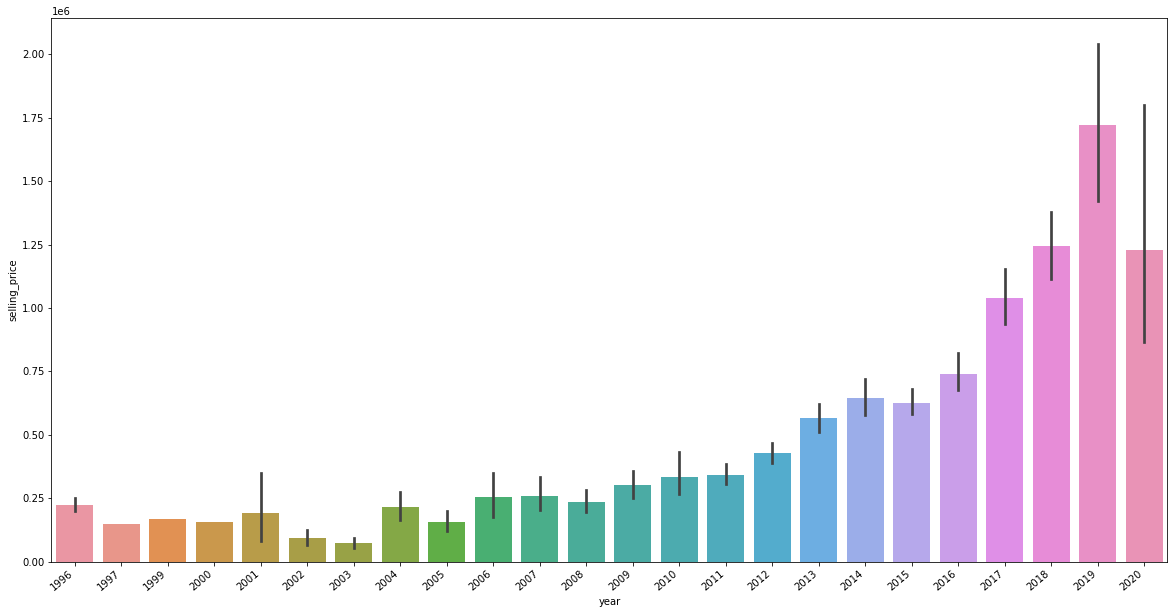

In [87]:
plt.subplots(figsize=(20,10))
ax=sns.barplot(x='year',y='selling_price',data=Diesel)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

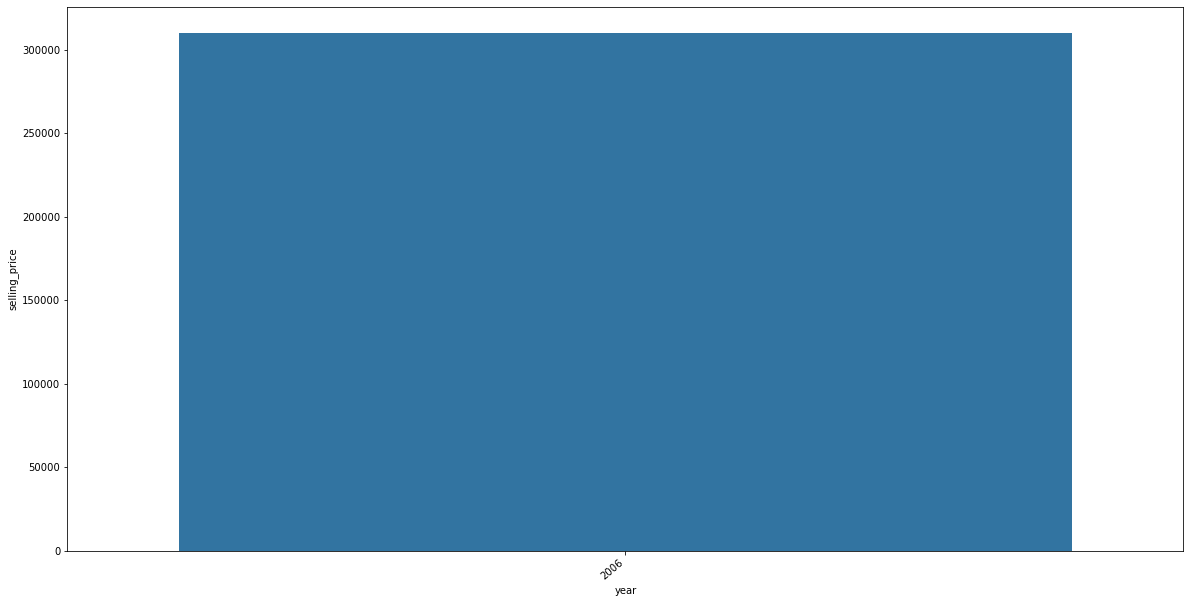

In [88]:
plt.subplots(figsize=(20,10))
ax=sns.barplot(x='year',y='selling_price',data=Electric)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

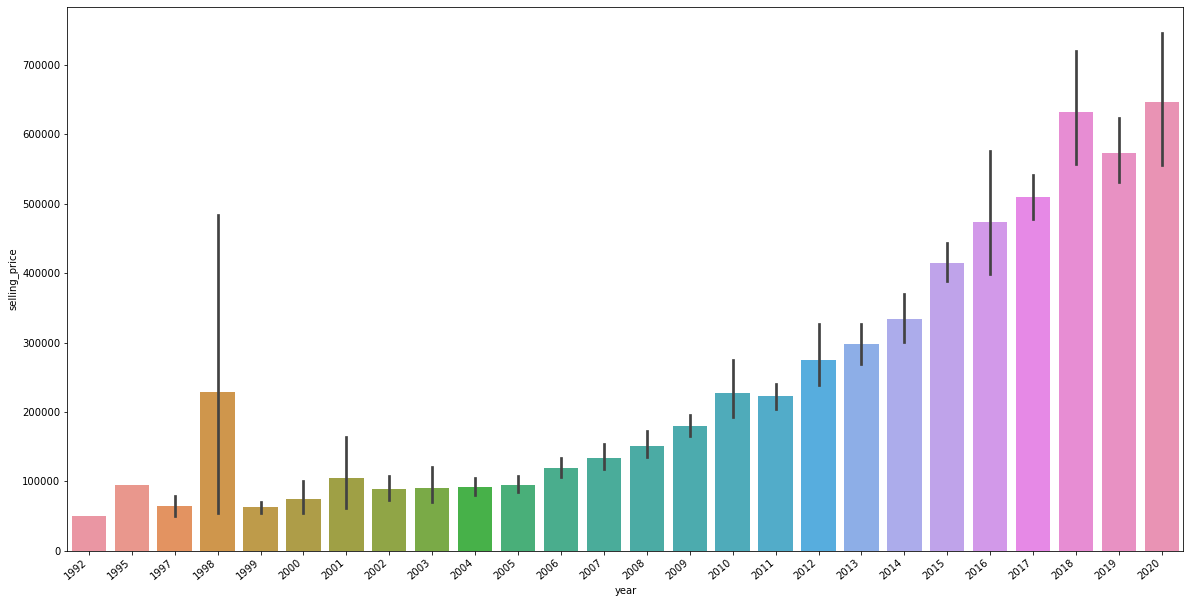

In [89]:
#Petrol
plt.subplots(figsize=(20,10))
ax=sns.barplot(x='year',y='selling_price',data=Petrol)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

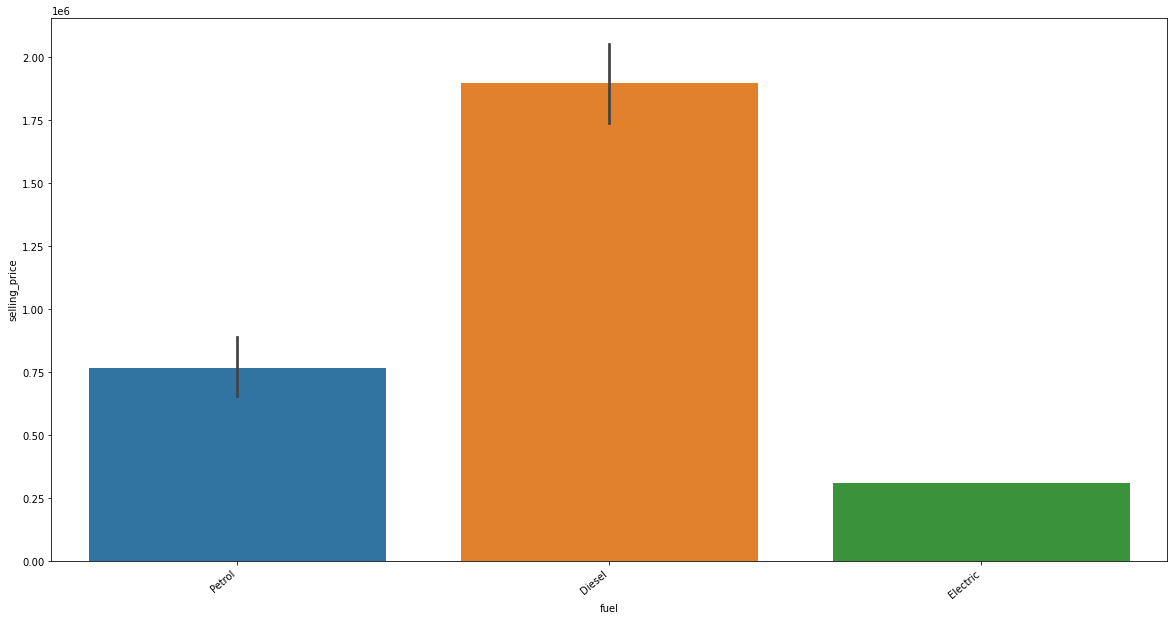

In [90]:
plt.subplots(figsize=(20,10))
ax=sns.barplot(x='fuel',y='selling_price',data=Auto)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

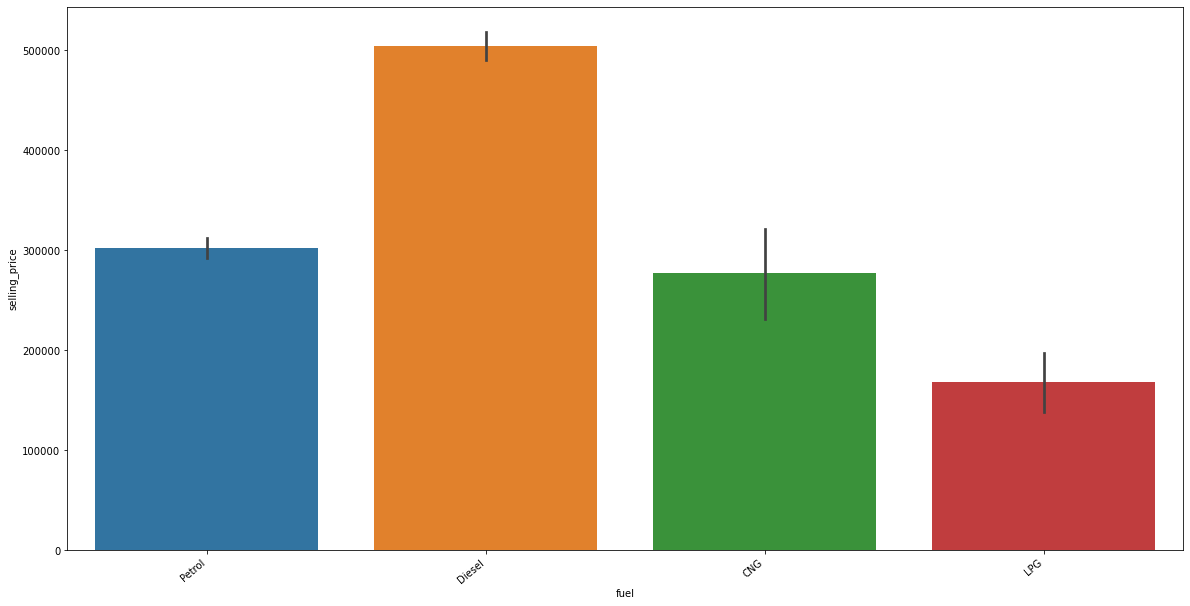

In [91]:
plt.subplots(figsize=(20,10))
ax=sns.barplot(x='fuel',y='selling_price',data=Manual)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

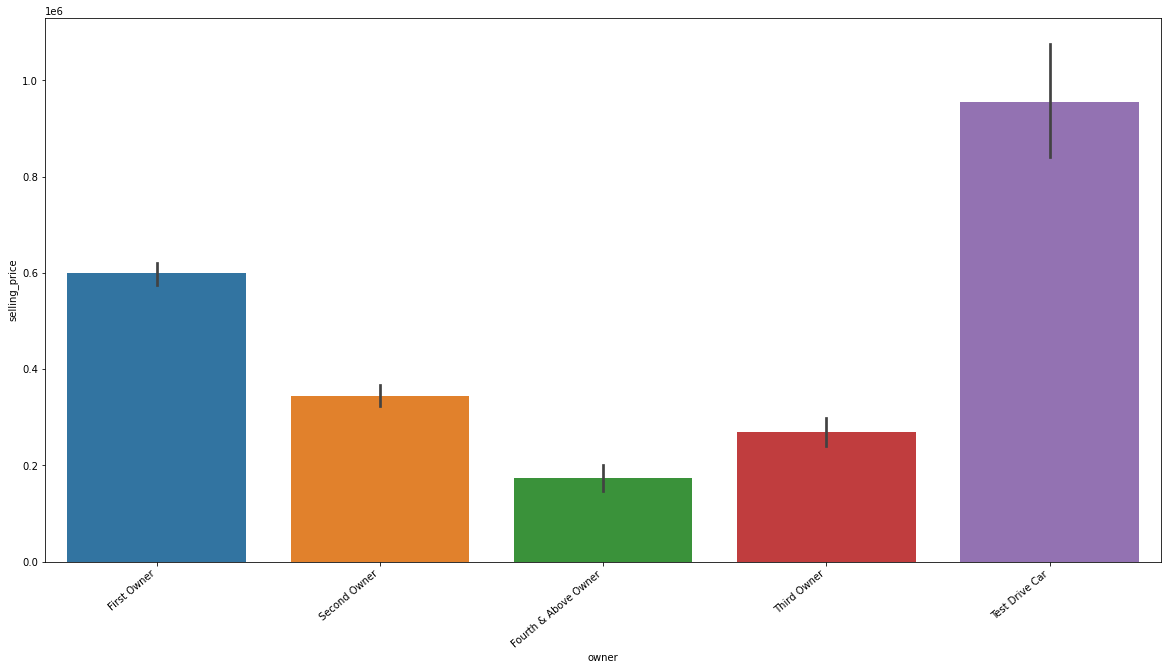

In [92]:
plt.subplots(figsize=(20,10))
ax=sns.barplot(x='owner',y='selling_price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

Plot looking at the owners and the selling price to see if the owner has an impact on the cars being sold .So by looking at the graphs we can confrim it .

## Feature Extraction ##

In [93]:
## Creating the company column
df['b']=df['name'].str.split(" ")
u = range(0,len(df))
o = []
for i in u:
    y = df['b'][i][0]
    o.append(y)
df['company'] = o
df.drop("b",axis=1,inplace = True)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,Car_year,company
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,2022,15,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,2022,15,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,2022,10,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,2022,5,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2022,8,Honda


In [94]:
print(df['company'].unique() )

#print(df['company'].value_counts())

['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Toyota' 'Jaguar'
 'Mercedes-Benz' 'Audi' 'Skoda' 'Jeep' 'BMW' 'Mahindra' 'Ford' 'Nissan'
 'Renault' 'Fiat' 'Volkswagen' 'Volvo' 'Mitsubishi' 'Land' 'Daewoo' 'MG'
 'Force' 'Isuzu' 'OpelCorsa' 'Ambassador' 'Kia']


So we have just extracted our first feature from the column "name" to create a column "company" .In the column we have just extracted we have different car company names accroding to the "name" column.This will help us to know which car company is the most bought also when it comes to creating our website.

In [95]:
df['Car_year'] = df['current_year']  - df['year']
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,Car_year,company
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,2022,15,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,2022,15,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,2022,10,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,2022,5,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2022,8,Honda


As you can see we have a new column "Car_year" which just tells us how old the car is .Which might help our model to perform better and lower the RMES score.

##  Model ##

In [96]:
df = df.drop('company',axis=1)
df = df.drop('name',axis=1)
df.drop(['year'],axis = 1,inplace =True)
df.drop(['current_year'],axis=1,inplace=True)

In [97]:
df.columns

Index(['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'Car_year'],
      dtype='object')

In [98]:
dum = df[['km_driven',"transmission","Car_year","fuel"]]
X = pd.get_dummies(dum,drop_first = True)

In [99]:
y = df['selling_price']

In [100]:
from sklearn.ensemble import ExtraTreesRegressor
model  = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

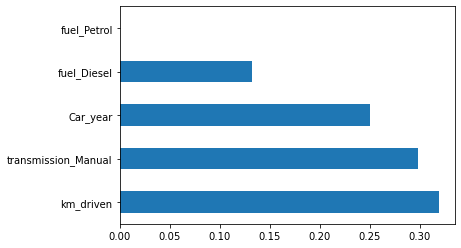

In [101]:
feat_importances = pd.Series(model.feature_importances_,index = X.columns)
feat_importances.nlargest(5).plot(kind="barh")
plt.show()

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state = 42)

In [103]:
## Hypertune the model 
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators= 1000,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 25)
                            
clf.fit(X_train,y_train)


RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)

c:\Users\kgathola\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

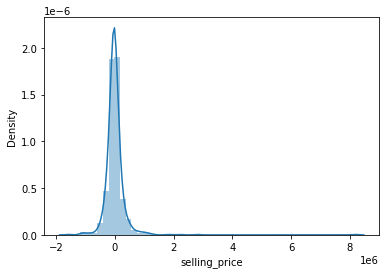

In [104]:
y_pred = clf.predict(X_test)

sns.distplot(y_test-y_pred)

In [105]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 171580.2442602764
MSE: 157617006335.7808
RMSE: 397010.0834182688


In [106]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(clf, file)